In [ ]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
LUMI = 10064
path = Path('.')
csv_path = path/'csvs_original_analysis'

In [ ]:
# Merge csvs into one dataframe
# Add a column indicating the original dataframe
df = pd.concat([pd.read_csv(f).assign(channel=f.name.split('.')[0]) 
                for f in csv_path.glob("./*.csv")], 
               ignore_index=True)

In [ ]:
df

,mLL,ptLL,etmiss,mtw,lep1_pt,lep1_eta,lep1_E,lep1_phi,lep1_ch,lep1_ID,...,lep2_ch,lep2_ID,lep3_pt,lep3_eta,lep3_E,lep3_phi,lep3_ch,lep3_ID,weight,channel
0,84.6421,129.0070,134.7380,67.3359,84.9283,-0.762946,110.8690,-3.095150,1,11,...,-1,11,31.1067,-0.370086,33.2613,2.793910,-1,11,0.677227,ttbar_lep
1,90.1959,20.2749,54.8276,79.9295,32.6880,1.965620,118.9750,-1.663380,1,13,...,1,13,24.9039,-0.569429,29.0520,2.514550,-1,13,1.171930,ttbar_lep
2,90.8109,54.6437,95.3019,149.4680,63.3237,0.137688,63.9249,-2.718310,1,11,...,-1,11,27.2657,1.648390,73.4946,-0.594212,1,11,1.085810,ttbar_lep
3,91.7614,43.5629,47.9771,57.3076,57.2736,-0.570952,66.8652,2.665790,1,13,...,-1,13,25.3978,-2.315000,129.8300,-0.530380,-1,13,1.006730,ttbar_lep
4,99.0003,94.4981,65.4745,72.1888,85.8229,0.485284,96.1285,0.075774,-1,13,...,1,13,21.5764,1.285120,41.9845,-2.411620,1,11,0.750583,ttbar_lep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477260,85.9126,51.6187,70.0663,127.1820,63.7340,-0.508454,72.1515,1.119960,-1,11,...,-1,11,26.3370,-1.699500,74.4544,2.924800,1,11,0.112292,llll
477261,90.6395,49.5345,43.7581,38.3130,54.0994,1.152740,94.2041,-1.709540,-1,11,...,-1,11,33.3689,2.369390,179.9320,2.547890,1,11,1.019480,llll
477262,93.4977,50.1080,54.9911,63.9223,68.9864,-1.692900,193.8240,1.073310,1,11,...,-1,11,23.4933,-1.855660,76.9672,2.240070,1,13,1.117670,llll
477263,87.1985,41.7639,41.0889,64.1620,57.6699,-2.121820,244.1210,2.757010,-1,13,...,1,13,29.6920,-1.109740,49.9306,-2.615020,1,13,0.000000,llll


In [ ]:
channels = df['channel'].unique()
channels

array(['ttbar_lep', 'llvv', 'lllv', 'Zee', 'single_top_wtchan', 'data',
       'Zmumu', 'WqqZll', 'ZqqZll', 'single_antitop_wtchan', 'llll'],
      dtype=object)

In [ ]:
df.groupby('channel').size()

channel
WqqZll                       14
Zee                          56
Zmumu                        47
ZqqZll                       33
data                        918
llll                      84151
lllv                     391841
llvv                         11
single_antitop_wtchan         5
single_top_wtchan             7
ttbar_lep                   182
dtype: int64

In [ ]:
with open(path/'original_hists/Files_base.txt') as f:
    file = f.readlines()
    
rescaling_factors = {}
for line in file:
    line = line.strip()
    if line.startswith('#'):
        continue
    if line:
        channel, cross_section, sum_weight, efficiency = line.split('|')
        rescaling_factors[channel] = LUMI * float(cross_section) / (float(sum_weight) * float(efficiency))

In [ ]:
hist_specs = {
    'etmiss': {'xmin': 0, 'xmax': 160, 'bins': 20, 'ymax': 340, 
               'xlabel': r'${\mathrm{E}_\mathrm{T}^{\mathrm{miss}}}$ [GeV]', 'ylabel': 'Events/bin', 
               'x_minor_ticks': 10, 'x_major_ticks': 20, 'y_minor_ticks': 10, 'y_major_ticks': 50},
    'mLL': {'xmin': 76, 'xmax': 106, 'bins': 20, 'ymax': 405, 
            'xlabel': r'$\mathrm{m}_{\mathrm{ll}}$ [GeV]', 'ylabel': 'Events/bin', 
            'x_minor_ticks': 1, 'x_major_ticks': 5, 'y_minor_ticks': 10, 'y_major_ticks': 50}, 
    'mtw': {'xmin': 0, 'xmax': 200, 'bins': 20, 'ymax': 390,
            'xlabel': r'$\mathrm{M}_{\mathrm{T}}^{\mathrm{W}}$ [GeV]', 'ylabel': 'Events/bin',
            'x_minor_ticks': 5, 'x_major_ticks': 20, 'y_minor_ticks': 10, 'y_major_ticks': 50},
    'ptLL': {'xmin': 0, 'xmax': 400, 'bins': 20, 'ymax': 370,
             'xlabel': r'$\mathrm{p}_{\mathrm{T}}^{\mathrm{ll}}$ [GeV]', 'ylabel': 'Events/bin',
             'x_minor_ticks': 10, 'x_major_ticks': 50, 'y_minor_ticks': 10, 'y_major_ticks': 50},
    'threeleptch': {'xmin': -1.75, 'xmax': 1.75, 'bins': 7, 'ymax': 2910,
                    'xlabel': r'$\mathrm{Q}^{\mathrm{all~lep}}$', 'ylabel': 'Leptons/bin',
                    'x_minor_ticks': 0.1, 'x_major_ticks': 0.5, 
                    'y_minor_ticks': 100, 'y_major_ticks': 500},
    'threeleptE': {'xmin': 0, 'xmax': 300, 'bins': 15, 'ymax': 1075,
                   'xlabel': r'$\mathrm{E}^{\mathrm{all~lep}}$ [GeV]', 'ylabel': 'Leptons/bin',
                   'x_minor_ticks': 10, 'x_major_ticks': 50, 
                   'y_minor_ticks': 50, 'y_major_ticks': 200},
    'threelepteta': {'xmin': -3, 'xmax': 3, 'bins': 15, 'ymax': 630,
                     'xlabel': r'$\mathrm{\eta}^{\mathrm{all~lep}}$', 'ylabel': 'Leptons/bin',
                     'x_minor_ticks': 0.2, 'x_major_ticks': 1, 
                     'y_minor_ticks': 20, 'y_major_ticks': 100},
    'threeleptID': {'xmin': 5.5, 'xmax': 20.5, 'bins': 15, 'ymax': 2750,
                    'xlabel': r'$\mathrm{|PGD~ID|}^{\mathrm{all~lep}}$', 'ylabel': 'Leptons/bin',
                    'x_minor_ticks': 0.5, 'x_major_ticks': 2, 
                    'y_minor_ticks': 100, 'y_major_ticks': 500},
    'threeleptphi': {'xmin': -3.2, 'xmax': 3.2, 'bins': 16, 'ymax': 415,
                     'xlabel': r'$\mathrm{\phi}^{\mathrm{all~lep}}$', 'ylabel': 'Leptons/bin',
                     'x_minor_ticks': 0.2, 'x_major_ticks': 1, 
                     'y_minor_ticks': 10, 'y_major_ticks': 50},
    'threeleptpt': {'xmin': 25, 'xmax': 200, 'bins': 10, 'ymax': 1975,
                    'xlabel': r'$\mathrm{p}_{\mathrm{T}}^{\mathrm{all~lep}}$ [GeV]', 'ylabel': 'Leptons/bin',
                    'x_minor_ticks': 5, 'x_major_ticks': 20, 
                    'y_minor_ticks': 50, 'y_major_ticks': 200},
}

In [ ]:
map_dict = {'WZ': ('lllv', 'lvvv', 'WqqZll', 'WlvZqq'),
            'ZZ, WW': ('WplvWmqq', 'WpqqWmlv', 'ZqqZll', 'llll', 'llvv'),
            'V+jets': ('Wplusenu', 'Wplusmunu', 'Wplustaunu', 'Wminusenu', 'Wminusmunu', 
                       'Wminustaunu', 'Ztautau', 'Zee', 'Zmumu'),
            'Other': ('ttbar_lep', 'single_top_tchan', 'single_antitop_tchan', 'single_top_wtchan', 
                      'single_antitop_wtchan', 'single_top_schan', 'single_antitop_schan'),
            'Data': ('data',)}

reversed_map_dict = {v: k for k, values in map_dict.items() for v in values if v in channels}

In [ ]:
origins_order = ('WZ', 'ZZ, WW', 'V+jets', 'Other')
colors = ("#ff9900", "#33cc33", "#6666cc", "#ff6666")

In [ ]:
def separate_leps(analysis):
    analysis = analysis.replace('threelept', '')
    return pd.melt(df, id_vars=('channel', 'weight'), value_vars=(f'lep1_{analysis}', f'lep2_{analysis}', f'lep3_{analysis}'), value_name=analysis)

In [ ]:
def get_counts(analysis, df=df):
    spec = hist_specs[analysis]
    analysis = analysis.replace('threelept', '')  # Handle the threelept cases
    counts_analysis = {}
    bins = np.linspace(spec['xmin'], spec['xmax'], spec['bins'] + 1)
    for channel in channels:
        data = df[df['channel'] == channel][analysis].clip(lower=spec['xmin'], 
                                                           upper=spec['xmax'])
        count, _ = np.histogram(data, bins=bins, weights=df[df['channel'] == channel]['weight'])
        if channel == 'data':
            counts_analysis[channel] = count
        else:
            counts_analysis[channel] = count * rescaling_factors[channel]
        
    return bins, counts_analysis

In [ ]:
def get_grouped_counts(ungrouped_counts, map_dict):
    grouped_counts = {}
    for channel in channels:
        origin = map_dict[channel]
        if origin not in grouped_counts:
            grouped_counts[origin] = ungrouped_counts[channel]
        else:
            grouped_counts[origin] += ungrouped_counts[channel]
    return grouped_counts

In [ ]:
def add_atlas_text(ax):
    plt.text(0.05, 0.93, 'ATLAS Open Data', transform=ax.transAxes, fontsize=13)
    plt.text(0.05, 0.90, 'for education', transform=ax.transAxes, style='italic', fontsize=8)
    plt.text(0.05, 0.85, '$\sqrt{s}$=13 TeV, $\int$L dt = 10 fb$^{-1}$', transform=ax.transAxes, fontsize=10)
    plt.text(0.05, 0.80, r'WZ$\rightarrow$l$\mathrm{\nu}$ll', transform=ax.transAxes, fontsize=13)

In [ ]:
def make_hist(analysis, counts, bins, save_path=None):
    bin_width = bins[1] - bins[0]
    
    plt.style.use('seaborn-v0_8-poster')
    plt.figure(figsize=(8, 6))
    
    # Bar plot
    bottom = np.zeros_like(bins[:-1])
    for i, channel in enumerate(reversed(origins_order)):
        plt.bar(bins[:-1], counts[channel], width=bin_width, bottom=bottom, align='edge', 
                label=channel, color=colors[i])
        bottom += counts[channel]
    
    # Data points
    data = counts['Data']
    ax = plt.gca()
    ax.scatter(bins[:-1][data>0] + bin_width/2, data[data>0], label='Data', 
               color='black', marker='o', s=50, zorder=10)

    # Graph aesthetics
    plt.ylabel(hist_specs[analysis]['ylabel'])
    plt.xlabel(hist_specs[analysis]['xlabel'])
    plt.ylim(0, hist_specs[analysis]['ymax'])
    plt.xlim(hist_specs[analysis]['xmin'], hist_specs[analysis]['xmax'])
    ax.xaxis.set_major_locator(plt.MultipleLocator(hist_specs[analysis]['x_major_ticks']))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(hist_specs[analysis]['x_minor_ticks']))
    ax.yaxis.set_minor_locator(plt.MultipleLocator(hist_specs[analysis]['y_minor_ticks']))
    ax.yaxis.set_major_locator(plt.MultipleLocator(hist_specs[analysis]['y_major_ticks']))
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend([handle for handle in reversed(handles)],[label for label in reversed(labels)], frameon=False)
    add_atlas_text(ax)
    
    if save_path:
        plt.savefig(save_path)

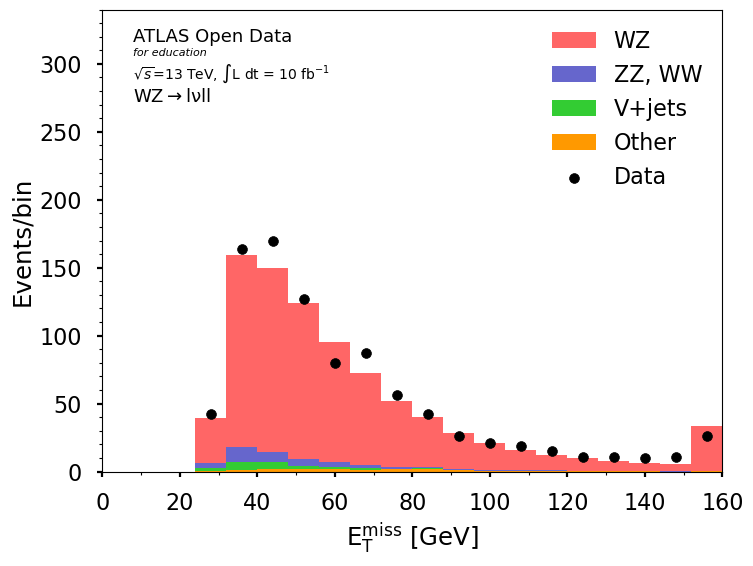

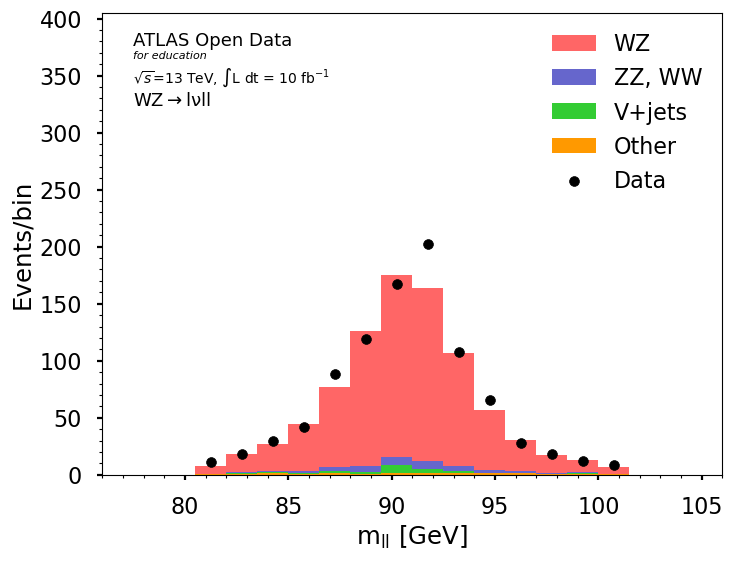

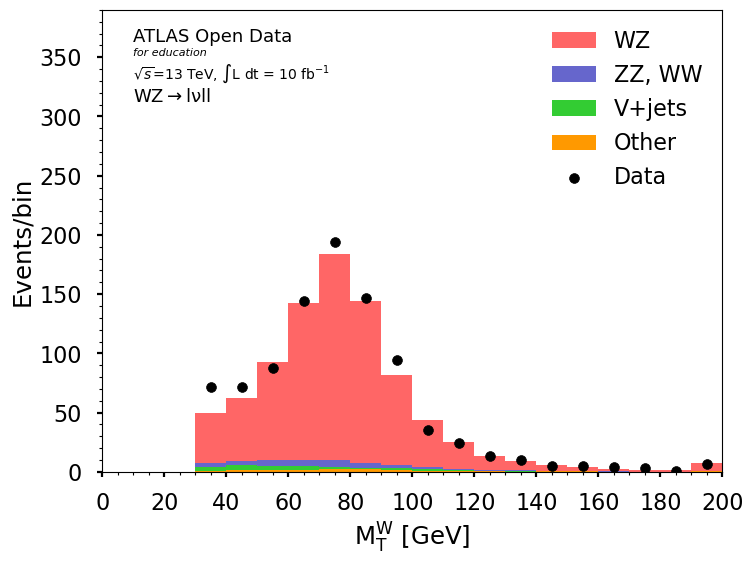

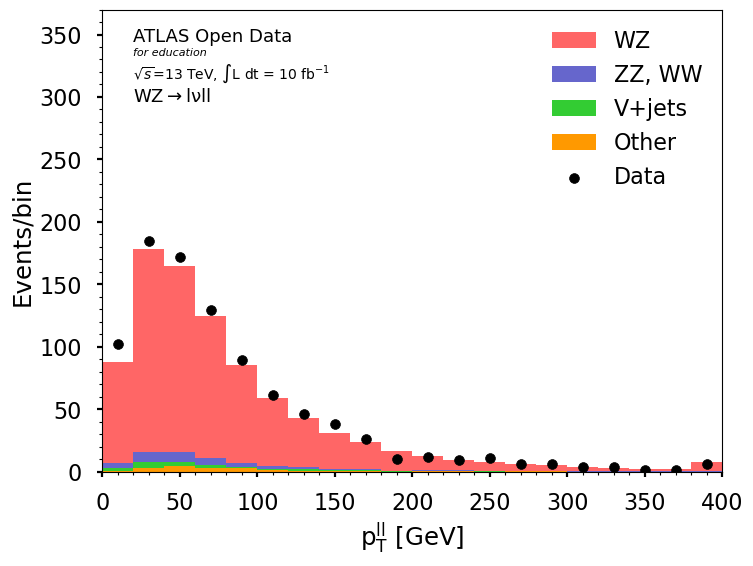

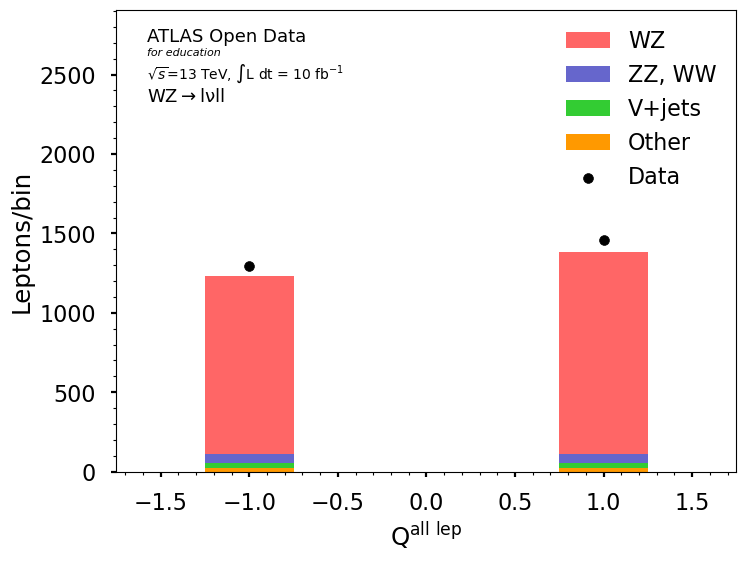

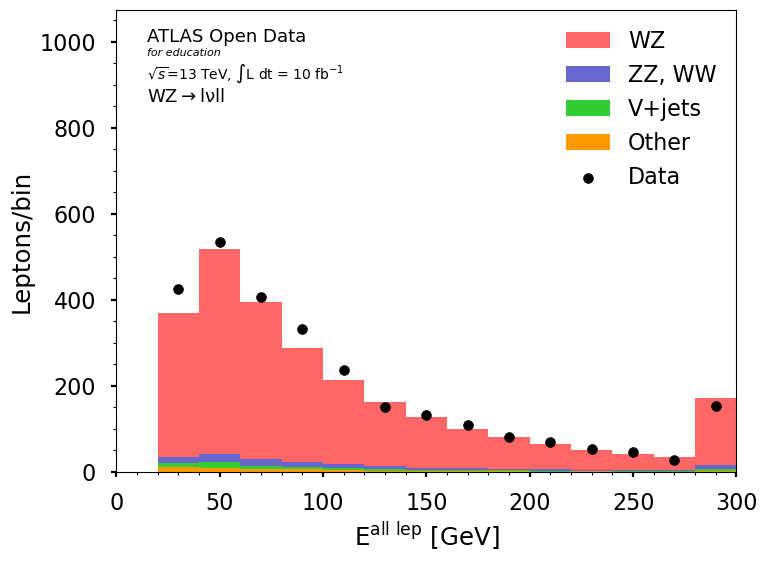

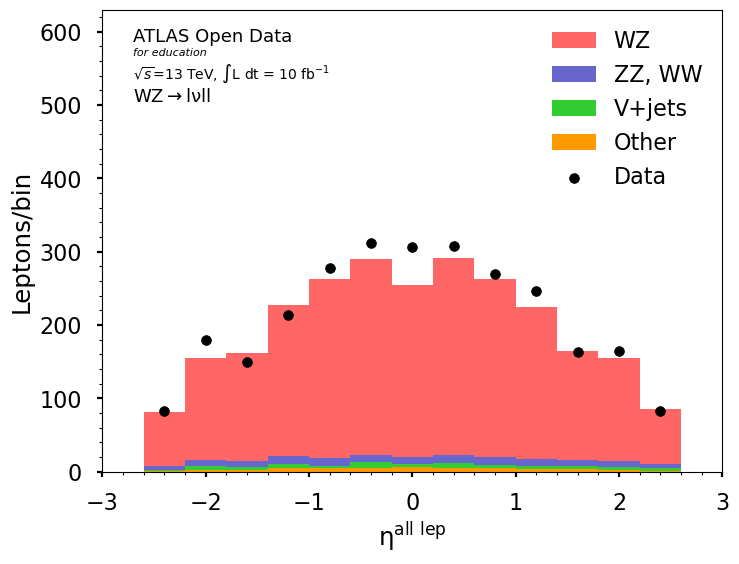

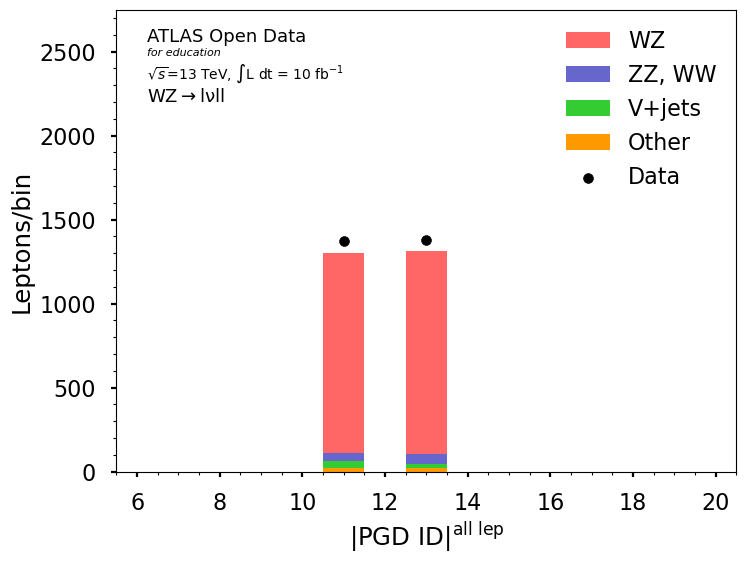

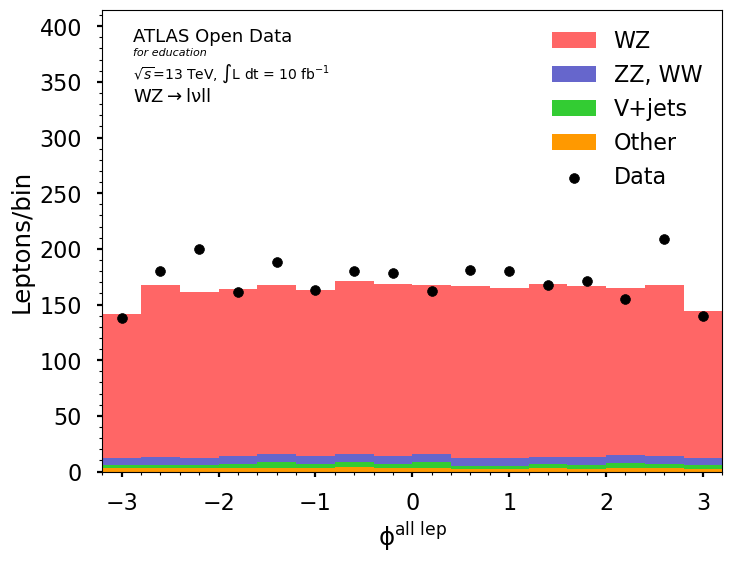

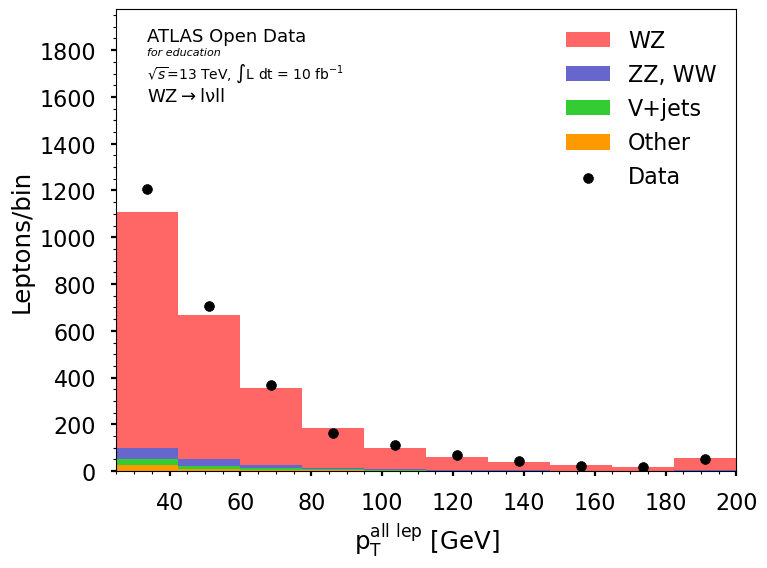

In [ ]:
hist_path = Path(path/'generated_hists')
hist_path.mkdir(exist_ok=True)
for analysis in hist_specs.keys():
    if not analysis.startswith('threelept'):
        bins, ungrouped_counts = get_counts(analysis)
    else:
        split_df = separate_leps(analysis)
        bins, ungrouped_counts = get_counts(analysis, df=split_df)
    grouped_counts = get_grouped_counts(ungrouped_counts, reversed_map_dict)
    make_hist(analysis, grouped_counts, bins, save_path=hist_path/f'{analysis}.png')
    